<a href="https://colab.research.google.com/github/furlancad/PythonFinancas/blob/main/M%C3%B3dulo_02_Manipula%C3%A7%C3%A3o_de_Dados_com_Python_Se%C3%A7%C3%A3o_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src = "https://github.com/Trading-com-Dados/pmf/blob/main/logotipo-trading-com-dados.svg?raw=true" width = "200">

<center><img src = "https://github.com/Trading-com-Dados/pmf/blob/main/PMF%20002.png?raw=true" width = "700">

# **Módulo 02 - Manipulação de Dados com Python**

O objetivo deste módulo é dar início ao processo de transformação e processamento de dados utilizando a biblioteca Pandas. Assim, vamos deixar nossos dados no formato que precisamos antes de realizar as análises de mercado financeiro e construção de estratégias. Além disso, mostraremos como filtrar, modificar e juntar diferentes tipos de dados.

Por fim, entraremos em conceitos de finanças quantitativas e mostraremos como obter e manipular dados de mercado financeiro usando diferentes bibliotecas.

Este Módulo abrange as seguintes seções:

**1. Noções básicas da obtenção e processamento de dados**

**2. Manipulação de dados**

**3. Consolidação de dataframes**

**4. Finanças quantitativas**

# **2. Manipulação de dados**

## 2.0. Importação dos dados

In [1]:
import pandas as pd

In [3]:
pd.read_csv('cotacoes_pd_series.csv')

,Date;Adj Close
0,04/01/2010;13.81743431
1,05/01/2010;13.6989584
2,06/01/2010;13.88407612
3,07/01/2010;13.75449371
4,08/01/2010;13.68044472
...,...
3212,13/12/2022;23.31999969
3213,14/12/2022;21.46999931
3214,15/12/2022;22.04000092
3215,16/12/2022;22.04999924


Estamos com alguns problemas de formatação

In [6]:
cotacoes = pd.read_csv('cotacoes_pd_series.csv', sep = ';', index_col = 0)

In [7]:
cotacoes.index = pd.to_datetime(cotacoes.index)

<ipython-input-7-80ddd973d020>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cotacoes.index = pd.to_datetime(cotacoes.index)


In [8]:
cotacoes

,Adj Close
Date,
2010-04-01,13.817434
2010-05-01,13.698958
2010-06-01,13.884076
2010-07-01,13.754494
2010-08-01,13.680445
...,...
2022-12-13,23.320000
2022-12-14,21.469999
2022-12-15,22.040001


## 2.1. Dataframe simples (uma coluna) vs Pandas Series

Observe a estrutura do objeto abaixo. Perceba que ele não possui tao claramente as delimitações de index e colunas típicas do Dataframe

Trata-se de outro objeto importante da Pandas: as Series

In [11]:
cotacoes['Adj Close']

Date
2010-04-01    13.817434
2010-05-01    13.698958
2010-06-01    13.884076
2010-07-01    13.754494
2010-08-01    13.680445
                ...    
2022-12-13    23.320000
2022-12-14    21.469999
2022-12-15    22.040001
2022-12-16    22.049999
2022-12-19    22.350000
Name: Adj Close, Length: 3217, dtype: float64

Dataframes podem ser um pouco mais fáceis visualizar e trabalhar. Veja algumas formas de trabalhar a transição entre pandas Series e pandas Dataframes

Nesse caso, forçamos uma lista de colunas com uma coluna apenas, mantendo o formato df

In [12]:
cotacoes[['Adj Close']]

,Adj Close
Date,
2010-04-01,13.817434
2010-05-01,13.698958
2010-06-01,13.884076
2010-07-01,13.754494
2010-08-01,13.680445
...,...
2022-12-13,23.320000
2022-12-14,21.469999
2022-12-15,22.040001


Transformar um Serie para df

In [15]:
type(cotacoes['Adj Close'])

pandas.core.series.Series

In [14]:
cotacoes['Adj Close'].to_frame()

,Adj Close
Date,
2010-04-01,13.817434
2010-05-01,13.698958
2010-06-01,13.884076
2010-07-01,13.754494
2010-08-01,13.680445
...,...
2022-12-13,23.320000
2022-12-14,21.469999
2022-12-15,22.040001


Os dataframes lembram muito os nossos conhecidos arquivos de planilha como Excel ou Google Sheets

## 2.2. Manipulações iniciais

In [16]:
petr = pd.read_csv('PETR4.csv')

In [17]:
petr.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,5.875,5.875,5.875,5.875,1.872027,35389440000
1,2000-01-04,5.550,5.550,5.550,5.550,1.768469,28861440000
2,2000-01-05,5.494,5.494,5.494,5.494,1.750625,43033600000
3,2000-01-06,5.475,5.475,5.475,5.475,1.744570,34055680000
4,2000-01-07,5.500,5.500,5.500,5.500,1.752536,20912640000


Perceba que no nosso dataframe a data está como coluna, e não como índice.

Mas o que é o índice de um dataframe afinal?

Transformando a data em índice

In [18]:
petr.index = petr.Date

In [19]:
petr.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-01-03,2000-01-03,5.875,5.875,5.875,5.875,1.872027,35389440000
2000-01-04,2000-01-04,5.550,5.550,5.550,5.550,1.768469,28861440000
2000-01-05,2000-01-05,5.494,5.494,5.494,5.494,1.750625,43033600000
2000-01-06,2000-01-06,5.475,5.475,5.475,5.475,1.744570,34055680000
2000-01-07,2000-01-07,5.500,5.500,5.500,5.500,1.752536,20912640000


Observe que agora a data se tornou o índice

Vamos agora remover então a coluna "Date" para que não haja redundância

In [21]:
petr.drop(["Date"], axis = 1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


In [22]:
petr

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-01-03,2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04,2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05,2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06,2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07,2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...,...
2022-12-13,2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14,2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15,2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


Repare que a coluna 'Date' voltou

In [23]:
petr.drop(["Date", 'Volume'], axis = 1)

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536
...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001


In [24]:
petr

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-01-03,2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04,2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05,2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06,2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07,2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...,...
2022-12-13,2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14,2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15,2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


Vamos garantir que as operações tenham validade global

In [25]:
petr.drop(["Date", 'Volume'], axis = 1, inplace = True)

In [26]:
petr

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536
...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001


Agora chegaremos ao mesmo objetivo mas de outra forma. Essa é uma das muitas belezas da programação

Carregando novamente para o index original

In [27]:
petr = pd.read_csv('PETR4.csv')

In [28]:
petr

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
1,2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2,2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
3,2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
4,2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...,...
5765,2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
5766,2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
5767,2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600
5768,2022-12-16,21.959999,22.110001,21.510000,22.049999,22.049999,90767300


In [29]:
petr = petr.set_index('Date')

In [30]:
petr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


Em qualquer lugar a transformação vai continuar válida

In [31]:
petr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


E se quiséssemos criar um novo dataframe contendo apenas as informações de cotação e excluindo o Volume? Precisamos usar o método .copy

In [32]:
cotacoes_petr = petr.copy()

In [33]:
cotacoes_petr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


In [34]:
cotacoes_petr.drop(['Volume'], axis = 1, inplace = True)

In [35]:
cotacoes_petr.tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001
2022-12-16,21.959999,22.110001,21.510000,22.049999,22.049999
2022-12-19,22.100000,22.469999,21.639999,22.350000,22.350000


Basta agora plotar o data frame inteiro!

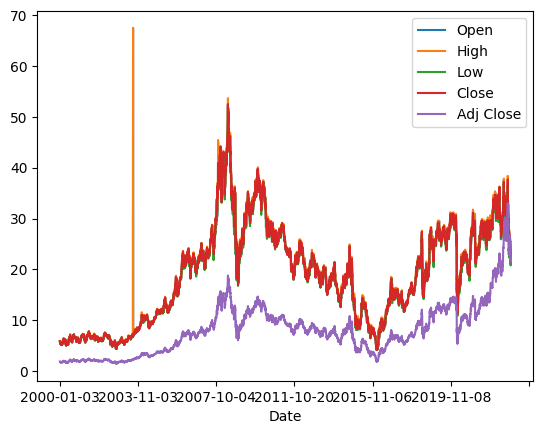

In [36]:
cotacoes_petr.plot();

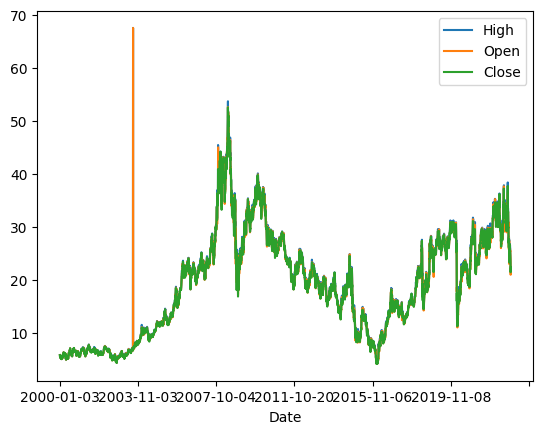

In [37]:
cotacoes_petr[['High', 'Open', 'Close']].plot();

E se quiséssemos dar um 'zoom' em datas mais recentes?

Por exemplo, nos 100 pregões mais recentes?

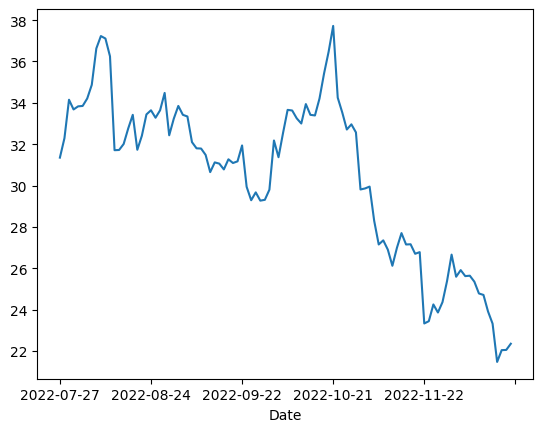

In [38]:
cotacoes_petr.tail(100).Close.plot();

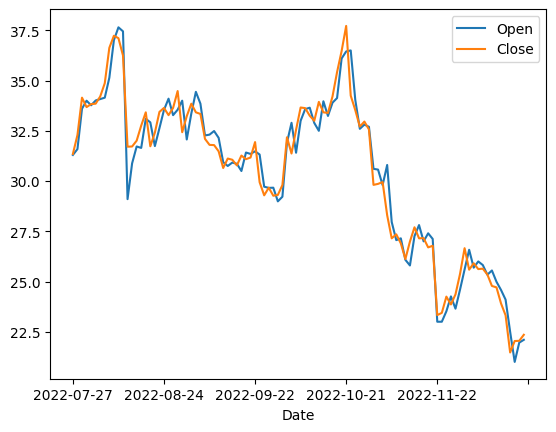

In [39]:
cotacoes_petr.tail(100)[['Open', 'Close']].plot();

Podemos também utilizar o operador slicing

In [40]:
cotacoes_petr[0:10]

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027
2000-01-04,5.550,5.550,5.550,5.550,1.768469
2000-01-05,5.494,5.494,5.494,5.494,1.750625
2000-01-06,5.475,5.475,5.475,5.475,1.744570
2000-01-07,5.500,5.500,5.500,5.500,1.752536
2000-01-10,5.613,5.613,5.613,5.613,1.788543
2000-01-11,5.475,5.475,5.475,5.475,1.744570
2000-01-12,5.483,5.483,5.483,5.483,1.747119
2000-01-13,5.325,5.325,5.325,5.325,1.696774


In [41]:
cotacoes_petr[:-1]

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536
...,...,...,...,...,...
2022-12-12,24.580000,24.660000,23.129999,23.910000,23.910000
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999


In [42]:
cotacoes_petr

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536
...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001


In [43]:
cotacoes_petr[-3:]

,Open,High,Low,Close,Adj Close
Date,,,,,
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001
2022-12-16,21.959999,22.110001,21.510000,22.049999,22.049999
2022-12-19,22.100000,22.469999,21.639999,22.350000,22.350000


## 2.3. Acessar células específicas do dataframe: filtros simples e shift

Imagine que você trabalha precisa selecionar alguns valores de OHLC para dias específicos. Como você poderia fazer?

É para resolver problemas assim que existem os métodos .loc e .iloc. Como eles funcionam?

Uma das ideias desses métodos é de possibilitar um filtro nos nossos dados para obter uma linha ou célula específicas.

In [ ]:
cotacoes_petr.head()

### 2.3.1. O método .loc

O .loc é utilizado quando o filtro deve ser feito com a métrica em uso no índice do nosso dataframe.

Por exemplo, a métrica utilizada como índice no nosso dataframe é data. Portanto, nesse caso devemos usar o .loc com a data que queremos fazer o filtro.

Imagine que o seu gestor te perguntou quais eram os valores de OHLC de PETR4 no dia 26/05/21

Você poderia ter feito assim:

In [ ]:
cotacoes_petr.loc['2021-05-26']

In [ ]:
pd.DataFrame(cotacoes_petr.loc['2021-05-26'])

In [ ]:
petr_filtrada = cotacoes_petr.loc['2021-05-26']

In [ ]:
petr_filtrada

Para obter os dados entre duas datas específicas

In [ ]:
petr_filtrada = cotacoes_petr.loc['2020-01-01':'2021-05-26']

In [ ]:
petr_filtrada.plot();

Embora mais usualmente usados em relação ao index, esses métodos também podem ser usados para acessar não apenas linhas mas colunas

In [ ]:
petr_filtrada = cotacoes_petr.loc['2020-01-01':'2021-05-26', 'Close']

In [ ]:
petr_filtrada.plot();

In [ ]:
petr_filtrada = cotacoes_petr.loc['2021-02-01':'2021-05-26', ['Open','Close']]
petr_filtrada.plot();

Filtrando a partir de uma data específica e indo até o último dia disponível

In [ ]:
petr_filtrada = cotacoes_petr.loc['2021-02-01':]
petr_filtrada.plot();

Obtendo os dados desde o início e indo até uma data limite específica, nesse caso 26/03/2017

In [ ]:
petr_filtrada = cotacoes_petr.loc[:'2017-03-26']
petr_filtrada.plot();

In [ ]:
petr_filtrada

### 2.3.2. O método .iloc

O .iloc é utilizado quando o filtro deve ser feito com a posição da linha dentro do nosso dataframe.

Por exemplo, caso você precise da linha 0 ou linha 1. Ou mesmo se precisar da linha 200 até a linha 500.

Exemplos:

Obtendo a linha 0 (primeira linha, excluindo o cabeçalho)

In [ ]:
cotacoes_petr.iloc[0]

In [ ]:
cotacoes_petr.iloc[1]

In [ ]:
cotacoes_petr.iloc[200]

Obtendo a última linha

In [ ]:
cotacoes_petr.iloc[-1]

Obtendo da linha 20 até a linha 200 (lembrando também da indexação, 200 não inclusiva)

In [ ]:
cotacoes_petr.iloc[20:200]

In [ ]:
petr_filtrada = cotacoes_petr.iloc[20:200]

In [ ]:
petr_filtrada.plot();

Obtendo todas as linhas até a linha 100 (linha 100 não entra)

In [ ]:
petr_filtrada = cotacoes_petr.iloc[:100]
petr_filtrada.plot();

In [ ]:
petr_filtrada = cotacoes_petr.iloc[4000:]
petr_filtrada.plot();

Da mesma que fizemos com o loc, incluindo o filtro de linhas e colunas no iloc

In [ ]:
cotacoes_petr.iloc[0:5, [0,3,4]]

In [ ]:
cotacoes_petr.iloc[0:5, 2:4]

Também conseguimos fazer filtro de várias colunas usando o loc

Vazio incluindo todas as linhas

In [ ]:
cotacoes_petr.loc[:,['Open','Close']]

Vazio incluindo todas as linhas de duas em duas

In [ ]:
cotacoes_petr.loc[::2,['Open','Close']]

Invertendo os dados de trás pra frente

In [ ]:
petr_invertida = cotacoes_petr.iloc[::-1]

petr_invertida.plot();

### 2.3.3. O método .shift

Permite acessar linhas anteriores, extramamente útil em dados séries temporais.

Ex., criar uma coluna com o fechamento do dia anterior

In [ ]:
cotacoes_petr.head()

In [ ]:
cotacoes_petr['Close']

In [ ]:
cotacoes_petr['Close'].shift(2)

In [ ]:
cotacoes_petr['Close_anterior'] = cotacoes_petr['Close'].shift(1)

In [ ]:
cotacoes_petr.head()

Ou a máxima do proximo dia...

In [ ]:
cotacoes_petr['Close'].shift(-1)

In [ ]:
 cotacoes_petr['Max_proximo_dia'] = cotacoes_petr['High'].shift(-1)

In [ ]:
cotacoes_petr.head()

## 2.4. Índices: explorando as séries temporais com index datetime

In [ ]:
import pandas as pd

In [ ]:
pd.read_csv('PETR4.csv')

In [ ]:
petr = pd.read_csv('PETR4.csv', index_col = 'Date')

In [ ]:
petr

In [ ]:
petr.dtypes

In [ ]:
petr.index

Observe que mesmo parecendo um index datetime, o dtype mostra que não está sendo reconhecido como uma data

In [ ]:
petr.index = pd.to_datetime(petr.index)

In [ ]:
petr.index

Se nenhum timezone está delimitado ainda, utilize o 'tz_localize'

In [ ]:
petr.index = petr.index.tz_localize('UTC')

In [ ]:
petr.index

In [ ]:
petr

Quando já existe um timezone, utilize o 'tz_convert'

In [ ]:
petr.index = petr.index.tz_convert('America/Sao_Paulo')

In [ ]:
petr.index

In [ ]:
petr.head()

#### Formatação da data

Se quisessemos acessar os dados do índice mas com formatos de data/hora específico. Por ex, apenas o ano...

In [ ]:
petr.index.year

In [ ]:
petr.index.month

In [ ]:
petr.index.day

In [ ]:
petr.index.date

In [ ]:
petr.index.time

In [ ]:
petr.index.month_name()

In [ ]:
petr.index.day_name()

#### Biblioteca datetime

Aliado à biblioteca datetime, a manipulação de data/hora fica mais versátil

In [ ]:
from datetime import datetime, timedelta

In [ ]:
data_atual = '04-01-2022'

In [ ]:
type(data_atual)

Convertemos para um objeto datetime

In [ ]:
datetime.strptime(data_atual, "%d-%m-%Y")

Obtendo data e hora do momento atual

In [ ]:
datetime.now()

In [ ]:
data_hora_atual = datetime.now()

In [ ]:
datetime.strftime(data_hora_atual, "%A")

In [ ]:
datetime.strftime(data_hora_atual, "%B")

In [ ]:
datetime.strftime(data_hora_atual, "%C")

In [ ]:
datetime.strftime(data_hora_atual, "%D")

Data composta

In [ ]:
datetime.strftime(data_hora_atual, "%d/%B")

#### Usando o timedelta

In [ ]:
data_200_dias_atras = datetime.now() -  timedelta(days = 200)

In [ ]:
data_200_dias_atras

In [ ]:
datetime.strftime(data_200_dias_atras, "%D")

In [ ]:
datetime.strftime(data_200_dias_atras, "%y")

#### Usando a Pandas

In [ ]:
data_atual = '01-01-2023'

In [ ]:
data_atual = pd.to_datetime(data_atual, format = "%d-%m-%Y")

In [ ]:
data_atual

Podemos criar uma lista de datas especificando o timeframe que queremos. Nesse caso, 'T' = minutos

In [ ]:
pd.date_range('04/01/2023', periods = 5, freq = 'T')

In [ ]:
pd.date_range('04/01/2023', periods = 10, freq = '5T')

Criando variáveis auxiliares

In [ ]:
petr.index

In [ ]:
petr.index.time

In [ ]:
petr['Horario'] = petr.index

In [ ]:
petr['Horario'] = petr['Horario'].dt.time

In [ ]:
petr.head()

In [ ]:
petr['Dia_do_ano'] = petr.index

In [ ]:
petr['Dia_do_ano'] = petr['Dia_do_ano'].dt.dayofyear

In [ ]:
petr.tail()

#### Método resample

E por fim, o método resample. Ele permite agrupar timeframes menores para criar um conjunto de dados agrupado. Nesse exemplo, vamos converter os dados diários em dados mensais

In [ ]:
petr

In [ ]:
petr_month = petr.resample('1M').agg({'Open':'first', 'High':'max', 'Low':'min', 'Close': 'last','Volume':'sum' })

In [ ]:
petr_month.head()

In [ ]:
petr_month.Close.plot();

In [ ]:
petr.Close.plot();

## 2.5. Colunas: filtrar, renomear e reordenar

In [ ]:
petr.head()

In [ ]:
petr.columns

In [ ]:
list(petr.columns)

Vamos retomar apenas as colunas originais OHLCV dos dados

In [ ]:
petr[['Open', 'High', 'Low', 'Close']]

In [ ]:
petr_filtrada = petr[['Open', 'High', 'Low', 'Close','Adj Close', 'Volume']]

In [ ]:
petr_filtrada

In [ ]:
petr_filtrada

E agora as 4 primeiras

In [ ]:
petr_filtrada = petr_filtrada.iloc[:, 0:4]

#### Renomeando colunas

Duas formas de renomear as colunas

In [ ]:
petr_filtrada.columns

In [ ]:
petr_filtrada.columns = ['Abertura', 'Máxima', 'Mínima', 'Fechamento']

In [ ]:
petr_filtrada.head()

Usamos um dicionário para renomear as colunas, contendo a estrutura {'nome antigo' : 'novo nome'}

In [ ]:
dicionario = {'Abertura' : 'Open', 'Máxima' : 'High', 'Mínima' : 'Low', 'Fechamento' : 'Close'}

In [ ]:
petr_filtrada.rename(dicionario, axis = 1)

In [ ]:
petr_filtrada

In [ ]:
petr_filtrada = petr_filtrada.rename(dicionario, axis = 1)

Também podemos passar o dicionário inteiro

In [ ]:
petr_filtrada = petr_filtrada.rename( {'Abertura' : 'Open', 'Máxima' : 'High', 'Mínima' : 'Low', 'Fechamento' : 'Close'} , axis = 1)

In [ ]:
petr_filtrada.head()

#### Reordenar as colunas

In [ ]:
list(petr_filtrada.columns)

In [ ]:
petr_filtrada[['Open', 'Close', 'Low', 'High']]

#### Adicionando novas colunas em posições específicas

Também podemos inserir uma nova coluna não necessariamente como a última (padrão), mas especificando qual a posição, o nome e os dados em si

In [ ]:
dados_nova_col = 'PETR4'

In [ ]:
petr_filtrada.insert(0, 'Ativo', dados_nova_col)

In [ ]:
petr_filtrada

Método assign

Outra forma menos usual mas que pode ser útil para criar novas colunas é através do .assign

In [ ]:
petr_filtrada['Close'] - petr_filtrada['Open']

In [ ]:
petr_filtrada.assign(resultado = (petr_filtrada['Close'] - petr_filtrada['Open']) ).tail()

## 2.6. Dataframes mais complexos, incluindo multi-index

#### Lista dos ativos do IBOV

Para demonstrar manipulações de dados em um dataframe de várias colunas, vamos extrair os dados das ações que compõem o IBOV

Para saber a composição atualizada do IBOV, acesse o link: https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm

Nesta seção, vamos utilizar algumas bibliotecas de dados de mercado financeiro, como a yfinance, que extrai dados do Yahoo Finance

Os ativos que compõem o IBOV são os seguintes:

["RADL3", "BRML3", "QUAL3", "ELET3", "BBDC3", "CCRO3", "BBSE3", "JBSS3", "ENBR3", "MRVE3", "ASAI3", "CRFB3", "TOTS3", "GGBR4", "TIMS3", "IRBR3", "USIM5", "BRFS3", "BBDC4", "BRAP4", "ABEV3", "UGPA3", "PETR3", "VBBR3", "BPAC11", "ITSA4", "BPAN4", "CSAN3", "DXCO3", "TAEE11", "PCAR3", "CIEL3", "RENT3", "PRIO3", "EGIE3", "HAPV3", "LWSA3", "LREN3", "FLRY3", "CPLE6", "RRRP3", "ALPA4", "CASH3", "COGN3", "ENGI11", "VALE3", "PETZ3", "SUZB3", "EMBR3", "MRFG3", "KLBN11", "AZUL4", "CMIN3", "AMER3", "ELET6", "BRKM5", "BEEF3", "CSNA3", "MGLU3", "SLCE3", "PETR4", "POSI3", "GOLL4", "SBSP3", "CYRE3", "EQTL3", "RDOR3", "GOAU4", "WEGE3", "ECOR3", "ARZZ3", "NTCO3", "CPFE3", "IGTI11", "EZTC3", "B3SA3", "CMIG4", "RAIL3", "RAIZ4", "HYPE3", "ITUB4", "ENEV3", "BBAS3", "VIIA3", "CVCB3", "SOMA3", "VIVT3", "MULT3", "SMTO3", "YDUQ3", "SANB11"]

Vamos transformar isso agora numa lista

In [ ]:
tickers_IBOV = ["RADL3", "BRML3", "QUAL3", "ELET3", "BBDC3", "CCRO3", "BBSE3", "JBSS3", "ENBR3", "MRVE3", "ASAI3", "CRFB3", "TOTS3", "GGBR4", "TIMS3", "IRBR3", "USIM5", "BRFS3", "BBDC4", "BRAP4", "ABEV3", "UGPA3", "PETR3", "VBBR3", "BPAC11", "ITSA4", "BPAN4", "CSAN3", "DXCO3", "TAEE11", "PCAR3", "CIEL3", "RENT3", "PRIO3", "EGIE3", "HAPV3", "LWSA3", "LREN3", "FLRY3", "CPLE6", "RRRP3", "ALPA4", "CASH3", "COGN3", "ENGI11", "VALE3", "PETZ3", "SUZB3", "EMBR3", "MRFG3", "KLBN11", "AZUL4", "CMIN3", "AMER3", "ELET6", "BRKM5", "BEEF3", "CSNA3", "MGLU3", "SLCE3", "PETR4", "POSI3", "GOLL4", "SBSP3", "CYRE3", "EQTL3", "RDOR3", "GOAU4", "WEGE3", "ECOR3", "ARZZ3", "NTCO3", "CPFE3", "IGTI11", "EZTC3", "B3SA3", "CMIG4", "RAIL3", "RAIZ4", "HYPE3", "ITUB4", "ENEV3", "BBAS3", "VIIA3", "CVCB3", "SOMA3", "VIVT3", "MULT3", "SMTO3", "YDUQ3", "SANB11"]

In [ ]:
tickers_IBOV.sort()

In [ ]:
tickers_IBOV

PONTO IMPORTANTE

As ações brasileiras no Yahoo Finance terminam com ".SA". Isso é válido inclusive para outros papéis, como ETFs, FIIs, BDRs

Como acrescentar ".SA" ao fim do nome de um papel?

Veja o raciocínio abaixo:

In [ ]:
acao = 'PETR4'

In [ ]:
acao + '.SA'

Precisamos então criar uma estrutura que faça isso para todos os papéis de uma vez

In [ ]:
tickers_IBOV_SA = [i + '.SA' for i in tickers_IBOV]

Uma vez que temos uma lista com o nome dos tickers corrigidos para fazer a busca na yfinance (que extrai os dados da Yahoo Finance)

**DISCLAIMER**

Caso a yfinance apresente problemas, utilize o .csv que será disponibilizado (detalhes abaixo neste código)

#### Instalação e abertura da yfinance, importação de dados

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
yf.download('VALE3.SA', start = '2021-01-01', end = '2021-12-31', period = "1d")

#### **Extração para vários ativos de uma vez**

Observe a estrutura dos dados acima. Temos Abertura, Máxima, Mínima, Fechamento, Fechamento Ajustado e Volume. Podemos reproduzir a mesma estrutura caso queiramos obter dados de vários papéis ao mesmo tempo.

In [ ]:
yf.download(tickers_IBOV_SA, start = '2021-01-01', end = '2021-12-31', period = "1d")

In [ ]:
cotacoes_ibov = yf.download(tickers_IBOV_SA, start = '2021-01-01', end = '2021-12-31', period = "1d")

#### **Caso a biblioteca yfinance não esteja funcionando**

In [ ]:
import pandas as pd

Siga os passos abaixo para abrir o arquivo .csv que disponibilizamos com os dados OHLC dos papéis do IBOV

In [ ]:
# Não é necessário rodar esta célula, este comando foi gerado durante a aula apenas para exportar o dataframe
cotacoes_ibov.to_csv('cotacoes_ibov.csv')

Utilize o arquivo fornecido nesta aula (cotacoes_ibov.csv)

In [ ]:
cotacoes_csv = pd.read_csv('cotacoes_ibov.csv', header = [0, 1], index_col = 0)

In [ ]:
cotacoes_ibov = cotacoes_csv

#### Caso a yfinance esteja funcionando normalmente, basta continuar a rotina

In [ ]:
cotacoes_ibov.columns

Para facilitar nossa vida, podemos obter apenas os dados da coluna **Adj Close** para todos os papéis de uma vez

In [ ]:
adjclose_ibov = yf.download(tickers_IBOV_SA, start = '2021-01-01', end = '2021-12-31', period = "1d")['Adj Close']

In [ ]:
adjclose_ibov

Visualização dos rótulos de cada nível

In [ ]:
set(cotacoes_ibov.columns.get_level_values(0))

In [ ]:
set(cotacoes_ibov.columns.get_level_values(1))

Poderiamos "dropar" o index 0 para nao sermos multi-index. Nesse exemplo não faria tanto sentido pois perderiamos o parâmetro base OHLCV. Mas pode ser muito útil em outras tabelas

In [ ]:
cotacoes_ibov.droplevel(0, axis = 1)

Filtrar apenas o índice que contém os preços de Adj Close

In [ ]:
cotacoes_ibov_adj_close = cotacoes_ibov['Adj Close']

In [ ]:
cotacoes_ibov.columns

Filtrar apenas o índice que contém os preços de Adj Close e ABEV3.SA ao mesmo tempo (acaba sendo uma única coluna).

Como é apenas uma coluna, ele desconsidera o formato dateframe e traz como um formato "series" da biblioteca pandas


In [ ]:
cotacoes_ibov_adjclose_abev = cotacoes_ibov[('Adj Close', 'ABEV3.SA')]

In [ ]:
cotacoes_ibov_adjclose_abev

In [ ]:
cotacoes_ibov_adjclose_abev.plot();

Usando pd.DataFrame podemos reconfigurar como dataframe

In [ ]:
cotacoes_ibov_adjclose_abev = pd.DataFrame(cotacoes_ibov_adjclose_abev)

In [ ]:
cotacoes_ibov_adjclose_abev

## 2.7. Manejo dos NAs e NaN

### 2.7.1. Checar o número de NaN do dataset

O método mais básico para lidar com missings é o isna()

Ele retorna um booleano (True/False).

In [ ]:
cotacoes_ibov.isna()

Como vimos, no Python o True equivale a 1 e False equivale a 0. Se eu somar uma coluna/linha composta por True/False eu consigo saber quantos True existem (e nesse caso do .isna, saber qts NAs existem)

O método sum() = sum(0), já que 0 é o default do método e representa a soma de todos as células de uma coluna.

Se colocarmos sum(1), teremos a soma de todas as celulas de uma linha

In [ ]:
cotacoes_ibov.isna().sum()

In [ ]:
count_null = cotacoes_ibov.isna().sum()

In [ ]:
count_null.head(25)

ASAI3 possui 37 células com NA. Começou a ser negociada no IBOV em março apenas

CMIN3 possui 32

Soma dos NAs por linhas. Primeira linha 24 NAs.

Lembrando que uma linha é composta por 6 índices 0 (Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume),

podemos concluir que existem 4 ativos (24/6) com NA na primeira linha

In [ ]:
count_null_linha = cotacoes_ibov.isna().sum(1)

O atributo shape retorna o número de linhas e coluna de um dataframe

In [ ]:
cotacoes_ibov.shape

In [ ]:
cotacoes_ibov.shape[0]

In [ ]:
cotacoes_ibov.shape[1]

In [ ]:
len(cotacoes_ibov.columns)

Medir o % de missings

In [ ]:
count_null/cotacoes_ibov.shape[0]

Usando as informações do shape e do isna, podemos fazer um filtro para retornar quais linhas (cotacoes_IBOV.shape[0]) ou colunas cotacoes_IBOV.shape[1] possuem uma fração específica de NAs

No exemplo, exibir as linhas onde temos pelo menos 1 NA

In [ ]:
cotacoes_ibov.isna().sum(1)>0

In [ ]:
cotacoes_ibov[ cotacoes_ibov.isna().sum(1)>0 ]

Vamos retornar apenas as linhas que tenham integridade, ou não-missings de pelo menos 90%

In [ ]:
cotacoes_ibov.shape[0]

In [ ]:
len(cotacoes_ibov)

In [ ]:
count_null/cotacoes_ibov.shape[0]

In [ ]:
cotacoes_ibov.isna().sum(0)/len(cotacoes_ibov)

In [ ]:
cotacoes_ibov.isna().sum(0)/len(cotacoes_ibov) < 0.1

Agora um filtro de NA mais complexo, onde os NAs representem mais de 50% dos dados de uma linha (NAs da linha/total de colunas > 0.5).

Vemos que nenhuma linha possui tantos NAs

In [ ]:
cotacoes_ibov.isna().sum(0)

In [ ]:
cotacoes_ibov.isna().sum(1)

In [ ]:
len(cotacoes_ibov.columns)

In [ ]:
cotacoes_ibov.isna().sum(1)/len(cotacoes_ibov.columns)

In [ ]:
(cotacoes_ibov.isna().sum(1)/len(cotacoes_ibov.columns)) > 0.5

In [ ]:
cotacoes_ibov[(cotacoes_ibov.isna().sum(1)/len(cotacoes_ibov.columns)) > 0.5]

In [ ]:
cotacoes_ibov[(cotacoes_ibov.isna().sum(1)/len(cotacoes_ibov.columns)) < 0.5]

In [ ]:
cotacoes_ibov[(cotacoes_ibov.isna().sum(1)/len(cotacoes_ibov.columns)) < 0.2]

In [ ]:
cotacoes_ibov[(cotacoes_ibov.isna().sum(1)/len(cotacoes_ibov.columns)) < 0.03]

#### Método dropna()

Sabendo disso, posso usar o dropna para retirar qualquer linha que seja NA para o ativo CMIN

Usando o argumento inplace nem preciso criar uma nova variável

(ex., cotacoes_IBOV2 que represente dados sem os NAs excluídos)

In [ ]:
cotacoes_ibov.dropna(subset = [('Adj Close', 'ASAI3.SA')], inplace = True)

In [ ]:
cotacoes_ibov.isna().sum()

In [ ]:
cotacoes_ibov.isna().sum().head(30)

##### **Exercício**

Encontre as colunas que tenham pelo menos 1 NA

In [ ]:
cotacoes_ibov.columns

In [ ]:
type(cotacoes_ibov.columns)

In [ ]:
cotacoes_ibov.columns[ cotacoes_ibov.isna().sum(0) >= 1 ]

Posso remover qualquer coluna (ativo) que apresente algum NA usando drop.

Esse método exige um argumento (axis) informando se a remoção deve ocorrer nas linhas ou colunas.
Axis = 1 colunas

In [ ]:
cotacoes_ibov_filter_na = cotacoes_ibov.drop(cotacoes_ibov.columns[ cotacoes_ibov.isna().sum(0) >= 1 ], axis = 1)

In [ ]:
cotacoes_ibov_filter_na.columns

In [ ]:
count_na = cotacoes_ibov_filter_na.isna().sum()

In [ ]:
max(count_na)

### 2.7.2. Diferentes formas de lidar com os NaN (não existe uma ideal, cada caso deve ser avaliado separadamente)

Vamos criar um novo conjunto de dados para facilitar a visualização do tratamento de dados

In [ ]:
!pip install yfinance
import yfinance as yf

In [ ]:
dados = yf.download('BBAS3.SA', start='2022-12-28', end='2023-01-03')[['Open', 'Close']]

In [ ]:
dados.head()

In [ ]:
dados = dados.asfreq('D')

In [ ]:
dados['Shifted'] = dados.Close.shift(1)

In [ ]:
dados

Outra forma de visualizar quanto os NaN representam em nosso dataset

In [ ]:
dados.info()

Remove as linhas (0) ou colunas (1) que possuem NaN

In [ ]:
dados_dropna = dados.dropna(axis = 0)

In [ ]:
dados_dropna

Usar um limite de dados non-null

Ex., manter linhas que possuam pelo menos 2 dados não-nulos

In [ ]:
dados_dropna = dados.dropna(axis = 0, thresh = 2)

In [ ]:
dados_dropna

Caso não queira simplesmente remover, algumas opções são:

In [ ]:
dadosfill0 = dados.fillna(0)

In [ ]:
dadosfill9 = dados.fillna(999999999)

In [ ]:
dadosfill9

Preenche os NaN de cada coluna com um valor desejado

In [ ]:
dados_dict = dados.fillna({"Open": 0, "Close": 1})

ffill e bfill

Forward filling ou backward filling

ffill (forward) = passa o valor prévio "para a frente", ou seja,
preenche com o valor prévio disponível (útil em séries temporais)

In [ ]:
dados.Close.fillna(method = 'ffill')

In [ ]:
dados.Close

bfill (backward) = traz o próximo valor disponível para trás

In [ ]:
dados.Close.fillna(method = 'bfill')

Preencher os NaNs com métricas do próprio conjunto de dados

In [ ]:
dados.fillna({'Open':dados.Open.mean(), 'Close': dados.Close.median() })

In [ ]:
dados

Interpolar (linear, nearest, zero, slinear, quadratic, cubic, spline, barycentric, polynomial)

In [ ]:
dados['Interpolate'] = dados.Close.interpolate(method = 'linear')

In [ ]:
dados

Visualizando os dados interpolados com equação linear

In [ ]:
dados.plot.scatter(x = 'Close', y = 'Close')

In [ ]:
dados.plot.scatter(x = 'Interpolate', y = 'Interpolate')

### 2.7.3. Visualização para dados de cotações em séries longas

As técnicas utilizadas anteriormente podem ser muito úteis nos mais diversos dataframes e conjuntos de dados.

Pensando em OHLC de séries temporais longas, vejamos um pouco mais essas técnicas

Vamos abrir uma base de dados externa.

Trabalhar NA é uma coisa extramamente importante que merece dedicar tempo.

In [ ]:
dados = pd.read_csv('Bovespa.csv')

In [ ]:
dados.head()

Vamos criar um novo dataframe para uma ação específica

In [ ]:
dados.index = pd.to_datetime(dados.Date)

In [ ]:
acao = 'CYRE3'

In [ ]:
CYRE = dados[acao]

In [ ]:
CYRE.plot(figsize = (12,7));

In [ ]:
CYRE = pd.DataFrame(CYRE)

O preenchimento usando a técnica de **"forward filling"** é normalmente o mais utilizado no mercado financeiro.

In [ ]:
CYRE2 = CYRE.ffill(axis = 0)

In [ ]:
CYRE2.plot(figsize = (12,7));

In [ ]:
acao = 'WEGE3'

In [ ]:
weg = dados[acao]

In [ ]:
weg.plot();

In [ ]:
weg.fillna(0).plot();

Uma outra opção é o preenchimento com a média, o que para dados de mercado financeiro pode não fazer tanto sentido.

In [ ]:
preco_medio = weg.mean()

In [ ]:
weg.fillna(preco_medio).plot();

### 2.7.4. Biblioteca missingno

Vamos aprender sobre uma nova biblioteca que tem como objetivo analisar os missings

In [ ]:
!pip install missingno

In [ ]:
import missingno as msno

In [ ]:
msno.matrix(dados)

In [ ]:
msno.bar(dados)

In [ ]:
# Exibe a correlação entre o número de missings
# em diferentes colunas como um mapa de calor (heatmap)

msno.heatmap(dados)

## 2.8. Redução do número de colunas - "Wide to Long"

#### Retomando DF 'cotacoes_ibov'

In [ ]:
cotacoes_ibov

In [ ]:
# Apenas execute esta célula caso você esteja reiniciando os estudos e não tenha capturado o dataframe cotacoes_ibov ainda

#import pandas as pd
#cotacoes_csv = pd.read_csv('cotacoes_ibov.csv', header = [0, 1], index_col = 0)
#cotacoes_ibov = cotacoes_csv

#### **Transformação wide to long**

**Melt**

O melt é utilizado na biblioteca pandas para realizar uma transformação que chamamos de "wide to long".

Ou seja, se tivermos um dataframe grande e largo podemos transformá-lo num dataframe longo, com poucas colunas mas com muitas linhas.

O que antes eram as colunas agora viram categorias em colunas novas, as "variáveis", e os valores são todos mostrados na coluna valor, ou "value".

In [ ]:
cotacoes_ibov_longo = pd.melt(cotacoes_ibov, ignore_index = False)

In [ ]:
cotacoes_ibov_longo

#### Utilizando filtros de colunas nos DFs melted

In [ ]:
cotacoes_ibov_longo_abev = cotacoes_ibov_longo[ (cotacoes_ibov_longo['variable_0'] == 'Close') & (cotacoes_ibov_longo['variable_1'] == 'ABEV3.SA')]

In [ ]:
cotacoes_ibov_longo_abev.value.plot();

In [ ]:
cotacoes_ibov_longo_abev

#### Verificando e alterando o nome das colunas

In [ ]:
cotacoes_ibov_longo.columns

In [ ]:
cotacoes_ibov_longo.columns = ['Parametro', 'Ativo', 'Valor']

In [ ]:
cotacoes_ibov_longo.head()

#### Método 'pivot'

Vamos retornar ao formato padrão

Primeiramente vamos estudar o caso de multi index

In [ ]:
cotacoes_ibov_longo_retorno = cotacoes_ibov_longo.pivot(columns = ['Parametro', 'Ativo'], values = 'Valor')

In [ ]:
cotacoes_ibov_longo_retorno.columns

In [ ]:
cotacoes_ibov_longo_retorno.head()

In [ ]:
retorno_ibov_ohlc = cotacoes_ibov_longo.pivot(columns = ['Parametro', 'Ativo'])

In [ ]:
retorno_ibov_ohlc['Valor']

#### E caso tivéssemos um DF simples, single index?

In [ ]:
cotacoes_ibov_abev = cotacoes_ibov_longo[cotacoes_ibov_longo['Ativo'] == 'ABEV3.SA']

In [ ]:
cotacoes_ibov_abev

In [ ]:
cotacoes_ibov_abev.pivot(columns = 'Parametro', values = 'Valor')

## 2.9. Filtros mais complexos

#### **Filtros com mais de uma condição**

Vamos criar uma cópia do dataframe original para fazermos algumas práticas de filtros e substituições

In [ ]:
df_cotacoes = cotacoes_ibov_longo.copy()

In [ ]:
df_cotacoes

In [ ]:
df_cotacoes_adjclose = df_cotacoes[df_cotacoes['variable_0'] == 'Adj Close' ]

In [ ]:
df_cotacoes_adjclose

In [ ]:
df_cotacoes[df_cotacoes.variable_0 == 'Adj Close' ]

Além de filtrar a coluna "variable_0", agora queremos estabelecer um filtro também na coluna "value" queremos selecionar as linhas que possuem valor menor de 10

Por causa da presença do "&", as duas condições precisam ser respeitadas

In [ ]:
df_cotacoes_lowcost = df_cotacoes[(df_cotacoes.variable_0 == 'Adj Close') & (df_cotacoes.value < 10 )]

In [ ]:
set(df_cotacoes_lowcost.variable_1)

Cotações maiores que R\$ 8,00 e menores que R$ 10,00

In [ ]:
df_cotacoes[(df_cotacoes.variable_0 == 'Adj Close') & (df_cotacoes.value < 10 ) & (df_cotacoes.value > 8 )]

In [ ]:
set(df_cotacoes[(df_cotacoes.variable_0 == 'Adj Close') & (df_cotacoes.value < 10 ) & (df_cotacoes.value > 8 )].variable_1)

**Exercício**

Calcule a média do volume de negociação de PETR4

In [ ]:
df_cotacoes.head()

In [ ]:
df_cotacoes.mean()

In [ ]:
df_petro = df_cotacoes[(df_cotacoes['variable_0'] == 'Volume') & (df_cotacoes['variable_1'] == 'PETR4.SA')]

In [ ]:
df_petro.head()

In [ ]:
volume_medio = df_petro.value.mean()

In [ ]:
type(volume_medio)

In [ ]:
df_cotacoes[df_cotacoes.value > df_petro.value.mean()]

In [ ]:
set(df_cotacoes[df_cotacoes.value > df_petro.value.mean()].variable_1)

#### **Filtros com mais de uma condição, incluindo "ou"**

Vamos complicar um pouco mais

Além do filtro acima, vamos criar um outro filtro onde a coluna variable_0 precisa ser "Adj Close" e o valor precisa ser menor que 10 OU maior que 80

In [ ]:
df_cotacoes[(df_cotacoes.variable_0 == "Adj Close") & ((df_cotacoes.value < 10) | (df_cotacoes.value > 80))]

#### **Filtro com base em lista**

Vamos selecionar ativos com base em uma lista

Ou seja, precisamos filtrar as linhas de tal forma que contenham apenas os papéis que determinamos na lista

In [ ]:
ativos_churrasco = ['ABEV3.SA','JBSS3.SA','CRFB3.SA','KLBN11.SA','RADL3.SA']

In [ ]:
df_cotacoes_churrasco = df_cotacoes[df_cotacoes.variable_1.isin(ativos_churrasco)]

Como selecionar todos os papéis que não estão na lista?

In [ ]:
alguns_bancos = ['ITUB4.SA','BBDC4.SA','BBAS3.SA','SANB11.SA','BIDI11.SA']

In [ ]:
df_cotacoes_sembancos = df_cotacoes[~df_cotacoes.variable_1.isin(alguns_bancos)]

In [ ]:
df_cotacoes_sembancos

#### **Filtro com base em date range**

Vamos lembrar como funciona o .loc

In [ ]:
df_cotacoes.loc['2021-12-30']

Utilizando o operador "date_range" para retornar todas as datas que estão presentes em um intervalo

In [ ]:
ibov_date_range = pd.date_range(start='2021-03-21',end='2021-03-31')

In [ ]:
ibov_date_range

In [ ]:
type(ibov_date_range)

In [ ]:
df_cotacoes[df_cotacoes.index.isin(ibov_date_range)]

In [ ]:
df_cotacoes.dtypes

In [ ]:
df_cotacoes.index = pd.to_datetime(df_cotacoes.index)

In [ ]:
df_cotacoes.index

In [ ]:
df_cotacoes[df_cotacoes.index.isin(ibov_date_range)]

#### **Filtro com base em caractere da string**

Lembrando dos operadores de filtros em strings,

veja como fazemos para retornar o quinto caractere do ticker de um papel

In [ ]:
acao = 'PETR4.SA'

In [ ]:
acao[4]

In [ ]:
acao[-4]

Dado isso, como podemos fazer para retornar apenas as ações ordinárias, ou seja, que têm final '3'?

In [ ]:
df_cotacoes['variable_1']

In [ ]:
df_cotacoes.variable_1.str[-4]

In [ ]:
df_cotacoes[df_cotacoes.variable_1.str[-4] == '3'  ]

In [ ]:
df_cotacoes[df_cotacoes.variable_1.str[-4] == '4'  ]

In [ ]:
set(df_cotacoes[df_cotacoes.variable_1.str[-4] == '3'  ].variable_1)

In [ ]:
set(df_cotacoes[df_cotacoes.variable_1.str[-4] == '4'  ].variable_1)

#### **Filtros .where e .mask**

Nesses casos, ao invés de remover os valores que nao obedecem o filtro, as linha/coluna são substituídas por NaN ou pelo valor/str desejado

In [ ]:
df_cotacoes.where(df_cotacoes.variable_1 == 'ABEV3.SA')

In [ ]:
df_cotacoes.where(df_cotacoes.variable_1 == 'ABEV3.SA', 0)

In [ ]:
df_cotacoes.where(df_cotacoes.variable_1 == 'ABEV3.SA', 'Vazio')

In [ ]:
df_cotacoes.mask(df_cotacoes.variable_1 == 'ABEV3.SA')

In [ ]:
df_cotacoes.mask(df_cotacoes.variable_1 == 'ABEV3.SA').head()

In [ ]:
df_cotacoes.mask(df_cotacoes.variable_1 == 'ABEV3.SA').tail()

## 2.10. Ordenação

Existem métodos diretos para ordenar/classificar índices e colunas

In [ ]:
df_cotacoes.head()

In [ ]:
df_cotacoes.sort_index()

Ordem decrescente

In [ ]:
df_cotacoes.sort_index(ascending = False)

E baseando-se em uma ou mais colunas

In [ ]:
df_cotacoes.sort_values('value', ascending = False)

In [ ]:
df_cotacoes.sort_values('variable_1', ascending = True)

In [ ]:
df_cotacoes.sort_values(['variable_1', 'variable_0'], ascending = True)

Em alguns casos, você deseja listar os maiores ou menores valores (ex., top 10 volumes negociados)

In [ ]:
df_volumes = df_cotacoes[df_cotacoes.variable_0 == 'Volume']

In [ ]:
df_volumes.head()

In [ ]:
df_volumes.nlargest(10, 'value')

Ou os 5 menores preços de fechamento registrados

In [ ]:
df_close = df_cotacoes[df_cotacoes.variable_0 == 'Close']

In [ ]:
df_close.head()

In [ ]:
df_close.nsmallest(5, 'value')

## 2.11. Strings em dataframes

### 2.11.1. Substituição com regex

Imagine que eu quero remover o "SA" do nome dos ativos

In [ ]:
df_cotacoes_copy = df_cotacoes.copy()

In [ ]:
df_cotacoes_copy.head()

Nesse caso em especial não teríamos muitos problemas porque o SA está precedido pelo ".". Então bastaria usar o replace ".SA"

Mas para fins didáticos, vamos ignorar o "."

In [ ]:
df_cotacoes_copy['Ativo']= df_cotacoes_copy.variable_1.str.replace("SA", "")

In [ ]:
df_cotacoes_copy.head()

Parece resolvido, mas e se pensarmos em ativos como Banco do Brasil ('BBSA3'), Assaí ('ASAI3'), Itaúsa ('ITSA3')?

In [ ]:
set(df_cotacoes_copy.Ativo)

Por isso, temos técnicas de susbtituição e localização mais eficientes usando as expressões regulares (regex)

In [ ]:
# Para remover os ".SA" dos tickers, precisamos usar um método chamado "replace"
# Precisamos indicar o que queremos remover e o que virá no lugar
# r'.SA$' nos indica qualquer palavra terminada em .SA


df_cotacoes_copy['Ativo']= df_cotacoes_copy.variable_1.str.replace('.SA$', "", regex = True)

In [ ]:
df_cotacoes_copy.head()

In [ ]:
df_cotacoes_copy['Ativo']= df_cotacoes_copy.variable_1.replace(to_replace = r'.SA$', value = "", regex = True)

In [ ]:
df_cotacoes_copy.replace(to_replace = r'^.SA', value = "", regex = True)

In [ ]:
# Para trocar "VIIA" por "VVAR", o raciocínio é o mesmo:
# Nesse caso, ^ para indicar uma string que comece com VIIA


df_cotacoes_alterado = df_cotacoes_copy.replace(to_replace = '^VIIA', value = "VVAR", regex = True)

In [ ]:
set(df_cotacoes_alterado.variable_1)

### 2.11.2. Concatenar e dividir

#### Concatenação

Concatenar strings e indicar um separador desejado

In [ ]:
df_cotacoes.head()

In [ ]:
df_cotacoes['Ativo_Parametro'] = df_cotacoes.variable_1.str.cat(df_cotacoes.variable_0, sep = '_')

In [ ]:
df_cotacoes.head()

Exercício

Remova o .SA antes de fazer a concatenação

#### Divisão de strings



Dividir strings e indicar output como listas ou colunas do próprio df

In [ ]:
df_cotacoes.head()

In [ ]:
df_cotacoes.Ativo_Parametro.str.split('_')

In [ ]:
df_cotacoes['Colunas_divididas'] = df_cotacoes.Ativo_Parametro.str.split('_')

In [ ]:
df_cotacoes.head()

In [ ]:
df_cotacoes[ ['Ativo', 'Parametro'] ] = df_cotacoes.Ativo_Parametro.str.split('_', expand = True)

In [ ]:
df_cotacoes.head()

## 2.12. Duplicatas

#### Análise de duplicatas

In [ ]:
df_cotacoes.head()

In [ ]:
df_cotacoes.duplicated().any()

Quantas duplicatas aparecem?

In [ ]:
df_cotacoes.duplicated().sum()

Ou seja, então há duplicatas. Vamos fazer uma verificação mais precisa coluna a coluna

In [ ]:
df_cotacoes['variable_0'].duplicated().any()

In [ ]:
df_cotacoes['variable_1'].duplicated().any()

In [ ]:
df_cotacoes['value'].duplicated().any()

In [ ]:
print(df_cotacoes['variable_0'].duplicated().any(),
df_cotacoes['variable_1'].duplicated().any(),
df_cotacoes['value'].duplicated().any())

Onde estão estas duplicatas?

In [ ]:
df_cotacoes[df_cotacoes.duplicated(keep = False)].tail()

In [ ]:
df_cotacoes.duplicated(subset = ['variable_0'])

In [ ]:
df_cotacoes.head()

In [ ]:
df_cotacoes.duplicated(subset = ['variable_0', 'variable_1'])

#### Remoção de duplicatas

Caso quiséssemos manter apenas o primeiro valor de cada parametro e ativo

In [ ]:
sem_duplicatas_first = df_cotacoes.drop_duplicates(subset = ['variable_0', 'variable_1'], keep = 'first')

In [ ]:
sem_duplicatas_first.head()

Outra forma de remover duplicatas é usando o .unique Nesse caso, ele retorna um array e não um filtro de duplicatas do df

In [ ]:
df_cotacoes.variable_1.unique()

## 2.13. Drop

In [ ]:
df_cotacoes.head()

Embora já tenhamos utilizado antes, vamos explorar o drop um pouco mais pois merece atenção.

Trata-se da função que deve ser utilizada quando precisamos remover linhas ou colunas

In [ ]:
df_cotacoes.index

In [ ]:
# Suponha que você quer remover três datas:

data01 = '2021-01-04'
data02 = '2021-01-06'
data03 = '2021-01-12'

In [ ]:
type(data01)

In [ ]:
df_cotacoes.drop([data01, data02, data03])

Agora, vamos ver uma situação onde o formato 'datetime' está presente

In [ ]:
df_cotacoes.index = pd.to_datetime(df_cotacoes.index)

In [ ]:
df_cotacoes.index

O seguinte comando vai resultar em erro pois o index tem formato 'datetime' e as datas passadas são 'str'

In [ ]:
df_cotacoes.drop([data01, data02, data03])

In [ ]:
data01 = pd.to_datetime('2021-01-04')
data02 = pd.to_datetime('2021-01-06')
data03 = pd.to_datetime('2021-01-12')

In [ ]:
df_cotacoes.drop([data01, data02, data03])

Podemos também remover colunas, pelo nome:

In [ ]:
df_cotacoes.drop(['value'], axis = 1).head()

In [ ]:
df_cotacoes

Podemos remover pelo índice

In [ ]:
df_cotacoes.columns

In [ ]:
df_cotacoes.columns[[0,2]]

In [ ]:
df_cotacoes.drop(df_cotacoes.columns[[0,2]], axis = 1)

## 2.14. Distribuição de dados em grupos

In [ ]:
import pandas as pd

In [ ]:
petr = pd.read_csv('PETR4.csv', index_col = 'Date')

In [ ]:
petr.head()

In [ ]:
petr.index

Filtrar apenas o ano de 2021

In [ ]:
datas = pd.date_range(start = '2021-01-01', end = '2021-12-31')

In [ ]:
petr[petr.index.isin(datas) ]

Converter o índice para datetime

In [ ]:
petr.index = pd.to_datetime(petr.index)

In [ ]:
petr = petr[petr.index.isin(datas) ]

In [ ]:
petr.head()

Agora vamos criar uma nova coluna que determina o resultado do pregão

In [ ]:
petr['Resultado%'] = (petr['Close'] - petr['Open'])/petr['Open']*100

In [ ]:
petr.head()

Poderia dividí-los em positivo x negativo

In [ ]:
import numpy as np

In [ ]:
petr['Resultado_binario'] = np.where(petr['Resultado%'] > 0, 'Positivo', 'Negativo')

In [ ]:
petr.head()

In [ ]:
petr.tail()

Vamos contar quantos dias tivemos resultados positivos ou negativos

In [ ]:
len(petr[petr['Resultado_binario'] == 'Positivo'])

In [ ]:
len(petr[petr['Resultado_binario'] == 'Negativo'])

Veja que tivemos mais dias negativos que positivos.

E se quisessemos encontrar um jeito de dividir os dados em dois grupos de mesmo tamanho?

In [ ]:
pd.cut(petr['Resultado%'], 2)

In [ ]:
petr['Grupos_mesmo_tamanho'] = pd.cut(petr['Resultado%'], 2)

In [ ]:
petr.head()

É possível também nomear as classes/categorias

In [ ]:
petr['Grupos_mesmo_tamanho'] = pd.cut(petr['Resultado%'], 2, labels = ['piores_dias', 'melhores_dias'])

In [ ]:
petr.head()

Podemos determinar os intervalos

In [ ]:
lista_intervalos = [(-50, -2), (-2, -1), (-1, 1), (1, 2), (2, 50)]

In [ ]:
bins = pd.IntervalIndex.from_tuples(lista_intervalos)

In [ ]:
petr['Grupos_pre_definidos'] = pd.cut(petr['Resultado%'], bins)

In [ ]:
petr.head()

In [ ]:
petr.dtypes

In [ ]:
petr.Grupos_pre_definidos.value_counts()

In [ ]:
petr[petr['Resultado%'].between(-1,1)]

## 2.15. Formatação de dataframes e modificação do estilo

In [ ]:
import pandas as pd

In [ ]:
petr = pd.read_csv('PETR4.csv', index_col='Date')

In [ ]:
petr.head()

In [ ]:
petr.index = pd.to_datetime(petr.index)

In [ ]:
petr = petr[petr.index >= '2022-12']

In [ ]:
petr['Resultado%'] = (petr['Close'] - petr['Open'])/petr['Open']*100

In [ ]:
petr.head()

In [ ]:
petr.insert(0, 'Ativo', 'PETR4')

In [ ]:
petr.head()

Arredondar os dados OHLC seria o primeiro passo de formatação a se pensar

In [ ]:
preco = 29.893042480

In [ ]:
round(preco, 2)

In [ ]:
round(petr, 2)

In [ ]:
petr.head()

Apresentando o método apply

In [ ]:
lambda x: round(x,2)

In [ ]:
petr.apply(lambda x: round(x,2))

Como temos a coluna ativo que é str teremos problemas

In [ ]:
petr.iloc[:, 1:] = petr.iloc[:, 1:].apply(lambda x: round(x,2))

In [ ]:
petr.head()

Vamos aprender sobre o operador %f no Python, que serve para ajustar a formatação da exibição de números (floats)


Exemplo

In [ ]:
x = 15.8383903

In [ ]:
print('O número é', x)

In [ ]:
print('%.1f' % x)

In [ ]:
print('%.2f' % x)

In [ ]:
print('O número é %.2f' % x)

In [ ]:
'O número é %.2f' % x

Basta lembrar dos parâmetros

**%:** determina que há uma configuração de formatação

**.1f:** 1 dígito depois do separador decimal

**% x:** exibe a variável com a formatação referida

Outra forma seria editando as opções dos objetos pandas como um todo. Funciona como um inplace, depois precisará reiniciar o kernel para cancelar

In [ ]:
pd.set_option('display.float_format', lambda x:  '%.3f' % x)

In [ ]:
petr.head()

#### Método style

In [ ]:
petr.style.format('{:.1f}', subset = ['Adj Close', 'Resultado%'])

Vamos criar uma estrutura de repetição para detectar quais são as colunas do tipo 'float'

In [ ]:
import numpy as np

In [ ]:
len(petr.columns)

In [ ]:
range(0, len(petr.columns))

In [ ]:
list(range(0, len(petr.columns)))

In [ ]:
lista_colunas_float = []

In [ ]:
for i in range(0, len(petr.columns)):
  if type(petr.iloc[1, i]) == np.float64:
    lista_colunas_float.append(i)

In [ ]:
lista_colunas_float

Vamos implementar na prática

In [ ]:
petr.columns[lista_colunas_float]

In [ ]:
petr.style.format('{:.2f}', subset = petr.columns[lista_colunas_float])

In [ ]:
petr.style.format('{:.2f}', subset = petr.columns[lista_colunas_float]).highlight_max()

In [ ]:
petr.style.format('{:.2f}', subset = petr.columns[lista_colunas_float]).highlight_max(color = 'red')

In [ ]:
petr.style.format('{:.2f}', subset = petr.columns[lista_colunas_float]).highlight_max(subset = ['Resultado%'],color = 'green')

In [ ]:
petr.style.format('{:.2f}', subset = petr.columns[lista_colunas_float]).highlight_min(subset = ['Resultado%'],color = 'red')

Vamos conhecer o método background_gradient

In [ ]:
petr.style.format('{:.2f}', subset = petr.columns[lista_colunas_float]).background_gradient(subset = ['Resultado%'])

In [ ]:
petr.style.format('{:.2f}', subset = petr.columns[lista_colunas_float]).background_gradient(subset = ['Resultado%'], cmap = 'YlOrRd')

Mapa de cores da matplotlib

https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
petr.style.format('{:.2f}', subset = petr.columns[lista_colunas_float]).background_gradient(subset = ['Resultado%'], cmap = 'RdYlGn')

In [ ]:
petr.style.format("{:.2f}", subset=petr.columns[lista_colunas_float]).\
      applymap(lambda x: "font-weight: bold; color: white; background-color : #d40202"
      if x < 0 else "font-weight: bold; color: white; background-color : #4eb55c", subset=["Resultado%"])

In [ ]:
petr.style.format("{:.2f}", subset=petr.columns[lista_colunas_float]).\
      applymap(lambda x: "font-weight: bold; color: white; background-color : #d40202"
              if x < 0 else "font-weight: bold; color: white; background-color : #4eb55c", subset=["Resultado%"]).\
      set_table_styles([{"selector": "td", "props": "text-align: center"},
                        {"selector": "th", "props": "text-align: center; font-weight: bold; background-color: lightblue; color: black; font-size: 14pt"},
                        {"selector": "th.index_name", "props": "text-align: center; font-weight: bold; background-color: purple; color: black; font-size: 14pt"},
                        {"selector": "th.row_heading", "props": "text-align: center; font-weight: bold; background-color: yellow; color: black; font-size: 11pt"},
                        {"selector": "td:hover", "props": "text-align: center; font-weight: bold; background-color: pink; color: black; font-size: 15pt"}])